In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Loading the dataset
data_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
data = pd.read_csv(data_path)

In [4]:
# Displaying basic information about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

In [5]:
# Displaying summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.06

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


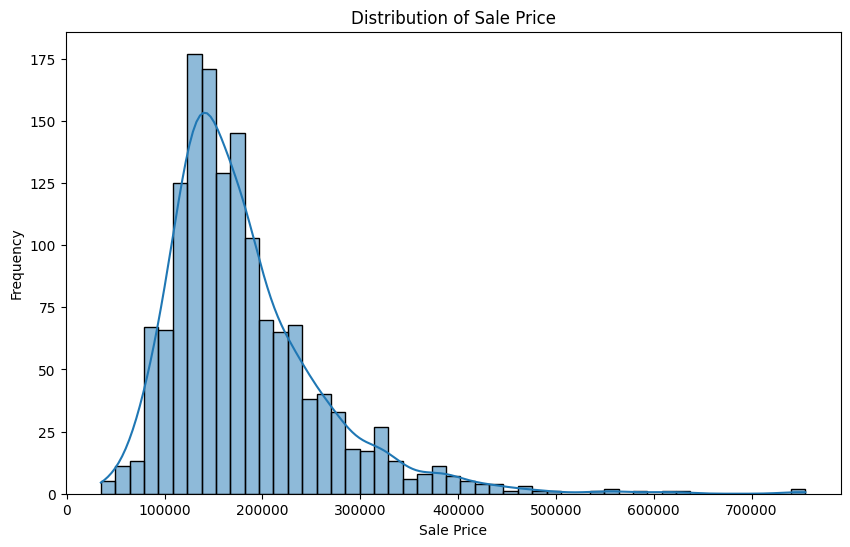

In [6]:
# EDA: Distribution of the Target Variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

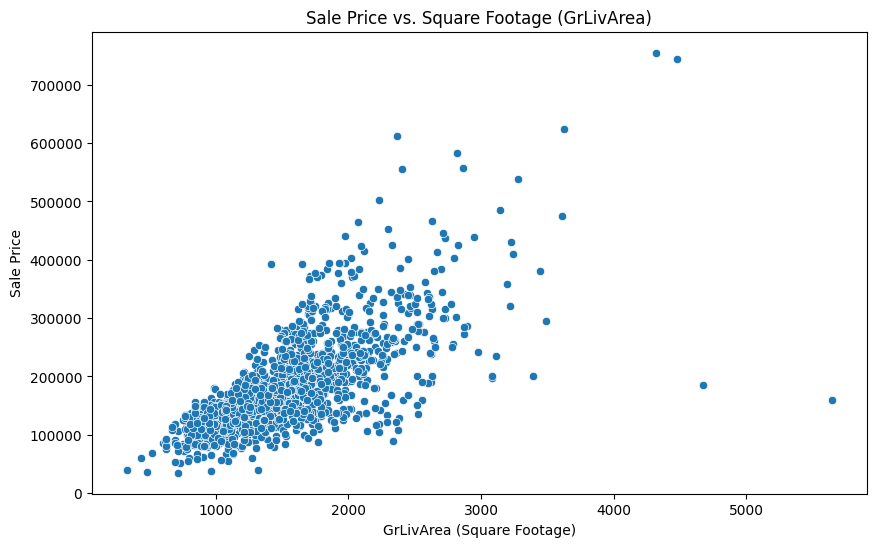

In [7]:
# EDA: Scatter plots to understand relationships
# Scatter plot of Sale Price vs. GrLivArea (Square footage)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.title('Sale Price vs. Square Footage (GrLivArea)')
plt.xlabel('GrLivArea (Square Footage)')
plt.ylabel('Sale Price')
plt.show()

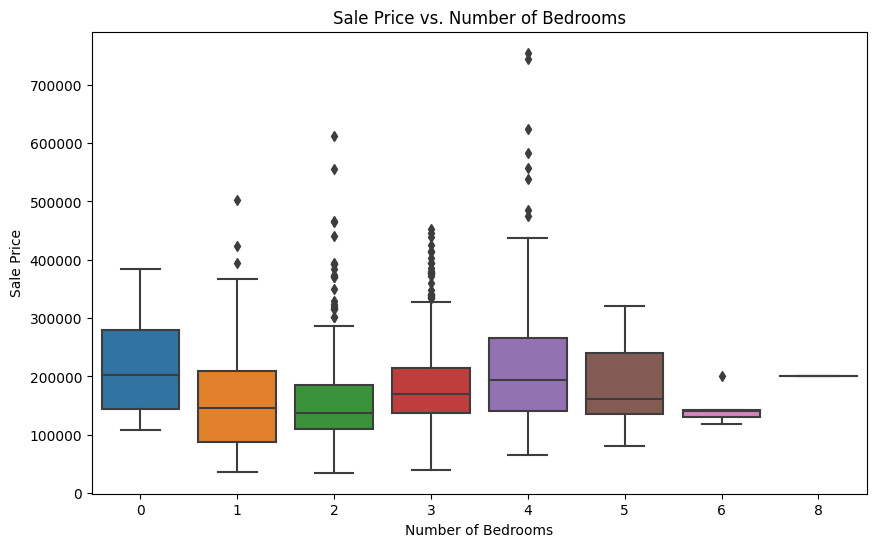

In [8]:
# Scatter plot of Sale Price vs. BedroomAbvGr (Number of Bedrooms)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['BedroomAbvGr'], y=data['SalePrice'])
plt.title('Sale Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Sale Price')
plt.show()

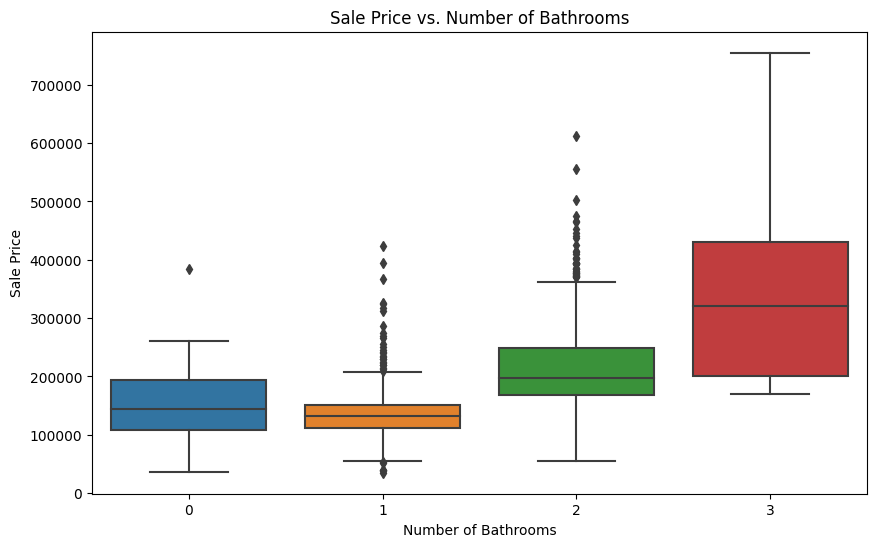

In [9]:
# Scatter plot of Sale Price vs. FullBath (Number of Bathrooms)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('Sale Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Sale Price')
plt.show()

In [10]:
# Checking for missing values
print("\nMissing Values:")
print(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].isnull().sum())


Missing Values:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64


In [11]:
# Dropping any rows with missing values in the selected features or target
data = data.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])
features = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
target = data['SalePrice']

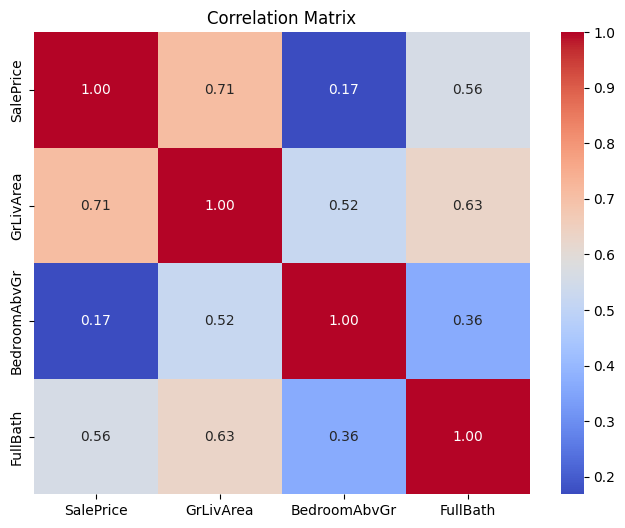

In [12]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
correlation_matrix = data[['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [14]:
# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Calculating performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [17]:
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Root Mean Squared Error: 52975.71771338122
R-squared Score: 0.6341189942328371


In [18]:
# Displaying the coefficients and intercept of the linear regression model
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [   104.02630701 -26655.16535734  30014.32410896]
Model Intercept: 52261.74862694461


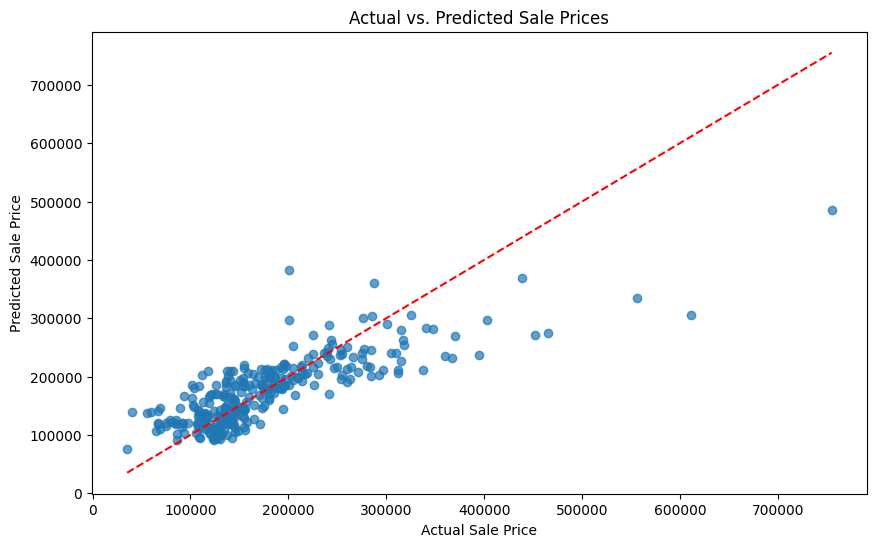

In [19]:
# Plotting Actual vs. Predicted prices for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted Sale Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()